# Automatidata — TLC  
## Análisis Exploratorio de Datos (EDA) y Visualización

### Contexto del proyecto
Este proyecto analiza datos de viajes de taxis (TLC) con el objetivo de comprender patrones operativos y de comportamiento a partir de información histórica de viajes. El dataset contiene variables relacionadas con tiempos, distancias, ubicaciones y montos asociados a cada viaje.

### Objetivo del análisis
El objetivo principal es realizar un **análisis exploratorio de datos (EDA)** para identificar patrones, tendencias y posibles anomalías que ayuden a comprender cómo se comportan los viajes de taxi en términos de duración, distancia, tiempo y recaudación.

### Alcance
El análisis se centra en:
- Exploración y comprensión de las variables disponibles  
- Identificación de valores atípicos y comportamientos relevantes  
- Análisis temporal y geográfico básico  
- Visualización de hallazgos clave  

Este proyecto **no incluye modelado predictivo**, y está enfocado en la generación de insights a partir del análisis descriptivo.

### Herramientas utilizadas
- Python (pandas, numpy, matplotlib, seaborn)  
- Jupyter Notebook  
- Visualizaciones complementarias en Tableau y Power BI (fuera de este notebook)


## Paso 1. Importaciones y carga

In [61]:
# Importar paquetes y bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar conjunto de datos en el marco de datos.
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: Analizar 


## Paso 2a. Exploración y limpieza de datos.

In [62]:
df.head()

,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [63]:
df.size

408582

In [64]:
df.describe()

,ID,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [66]:
# Convertimos columnas de datos a fecha y hora
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


### Calidad de los datos

A partir del resumen del dataset, no se identifican valores faltantes: todas las columnas presentan el mismo número de registros no nulos (22,699). Por ello, no fue necesario aplicar técnicas de imputación o eliminación por valores ausentes. El análisis se enfoca en validar la consistencia y el rango de los valores registrados.

### Análisis de valores atípicos

Se identifican valores atípicos en varias variables numéricas. En particular, se observan montos negativos en variables como `fare_amount`, `extra`, `mta_tax`, `improvement_surcharge` y `total_amount`, los cuales no son coherentes con el contexto del negocio y probablemente correspondan a errores de registro o ajustes administrativos.  

Asimismo, existen valores extremadamente altos —por ejemplo, tarifas cercanas a 1,000, montos totales superiores a 1,200 y distancias de viaje muy elevadas— que se encuentran muy por encima del comportamiento típico de los datos. Estos valores son analizados mediante visualizaciones como boxplots para evaluar su magnitud y posible impacto en el análisis.

### Distribución de variables clave

Las distribuciones de las variables indican que la mayoría de los viajes corresponden a trayectos cortos, con distancias reducidas y tarifas relativamente bajas, lo que es consistente con un entorno urbano. Variables como `trip_distance`, `fare_amount` y `total_amount` presentan distribuciones asimétricas con sesgo a la derecha, caracterizadas por colas largas generadas por un pequeño número de viajes muy largos o costosos.

Este patrón permite distinguir entre el comportamiento típico de los viajes y los casos extremos, facilitando una mejor comprensión de la dinámica general del servicio y apoyando la interpretación de los hallazgos obtenidos en el análisis exploratorio.


## Paso 2b. Selección de los tipos de visualización

Para el análisis exploratorio de datos (EDA) del conjunto de datos TLC, se seleccionaron visualizaciones que permiten comprender la distribución de las variables, identificar valores atípicos, analizar relaciones entre métricas clave y detectar patrones temporales y espaciales.

- **Diagramas de caja (boxplots)**: utilizados para identificar valores atípicos y analizar la dispersión de variables como `trip_distance`, `fare_amount`, `total_amount` y **`trip_duration`**.
- **Histogramas**: empleados para examinar la forma de la distribución y el sesgo de variables numéricas clave, como distancias, duración del viaje y montos.
- **Diagramas de dispersión**: usados para explorar la relación entre variables continuas, por ejemplo entre `trip_distance` y `total_amount`.
- **Gráficos de líneas**: aplicados para observar patrones y tendencias temporales al agregar los datos por fecha, mes o trimestre.
- **Mapas geográficos**: utilizados para visualizar patrones espaciales de los viajes a partir de las ubicaciones de recogida (`PULocationID`) y entrega (`DOLocationID`).

En conjunto, estas visualizaciones permiten analizar el comportamiento típico de los viajes, detectar anomalías, comprender relaciones entre variables clave y extraer insights relevantes sobre la dinámica temporal y geográfica del servicio.


<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: Construir 

## Paso 3. Visualización de datos

**Distancia del viaje**

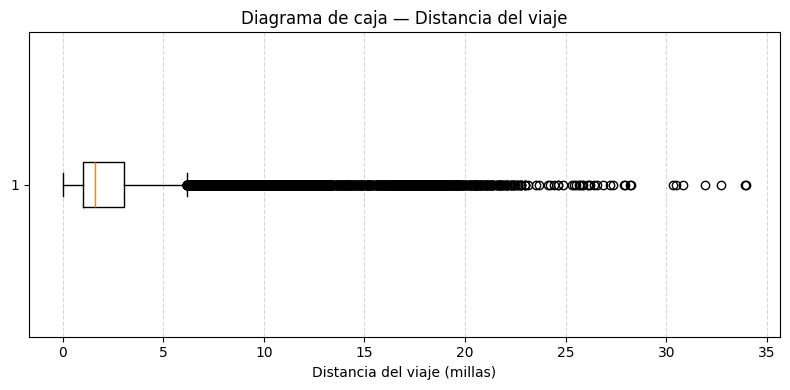

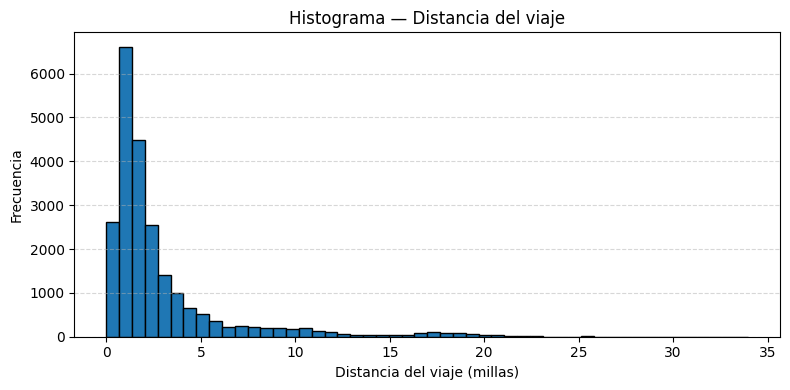

In [67]:
# Diagrama de caja de la distancia del viaje
plt.figure(figsize=(8, 4))
plt.boxplot(
    df['trip_distance'].dropna(),
    vert=False,
    showfliers=True
)
plt.title('Diagrama de caja — Distancia del viaje')
plt.xlabel('Distancia del viaje (millas)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Histograma de la distancia del viaje
plt.figure(figsize=(8, 4))
plt.hist(
    df['trip_distance'].dropna(),
    bins=50,
    edgecolor='black'
)
plt.title('Histograma — Distancia del viaje')
plt.xlabel('Distancia del viaje (millas)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**cantidad total**

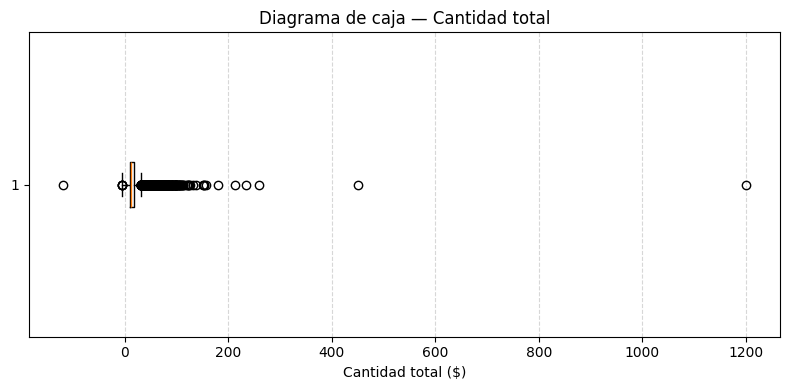

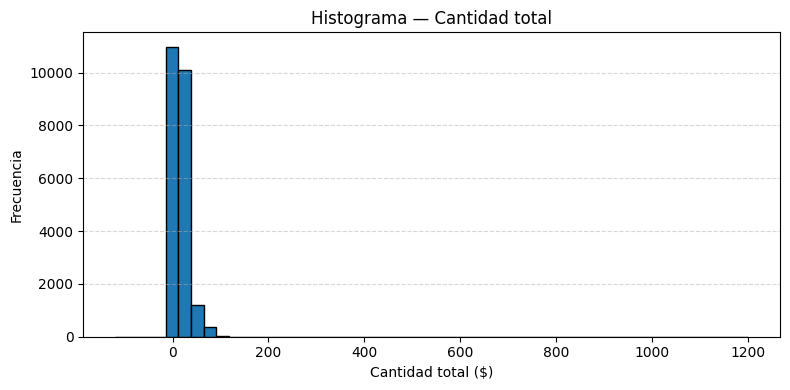

In [68]:
# Diagrama de caja de la cantidad total
plt.figure(figsize=(8, 4))
plt.boxplot(
    df['total_amount'].dropna(),
    vert=False,
    showfliers=True
)
plt.title('Diagrama de caja — Cantidad total')
plt.xlabel('Cantidad total ($)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Histograma de la cantidad total
plt.figure(figsize=(8, 4))
plt.hist(
    df['total_amount'].dropna(),
    bins=50,
    edgecolor='black'
)
plt.title('Histograma — Cantidad total')
plt.xlabel('Cantidad total ($)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Monto de propina**

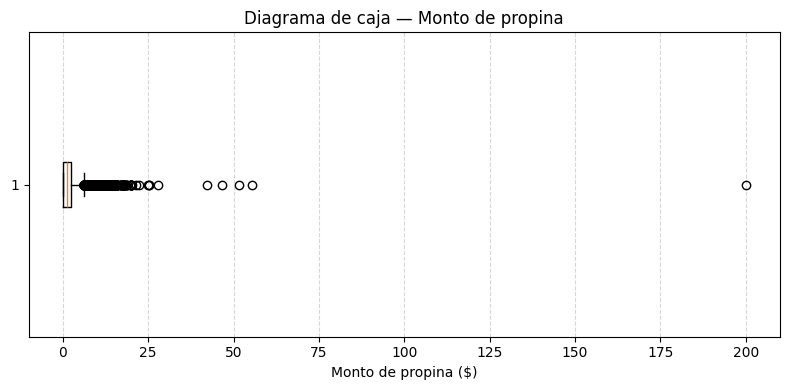

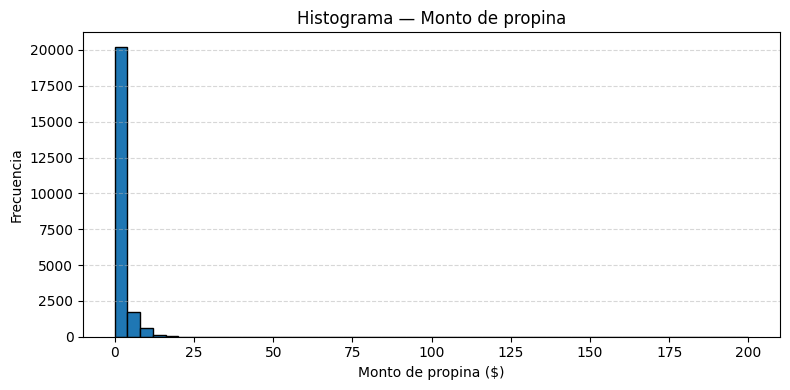

In [69]:
# Diagrama de caja del monto de propina
plt.figure(figsize=(8, 4))
plt.boxplot(
    df['tip_amount'].dropna(),
    vert=False,
    showfliers=True
)
plt.title('Diagrama de caja — Monto de propina')
plt.xlabel('Monto de propina ($)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Histograma del monto de propina
plt.figure(figsize=(8, 4))
plt.hist(
    df['tip_amount'].dropna(),
    bins=50,
    edgecolor='black'
)
plt.title('Histograma — Monto de propina')
plt.xlabel('Monto de propina ($)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Monto de propina por proveedor**

<Figure size 800x400 with 0 Axes>

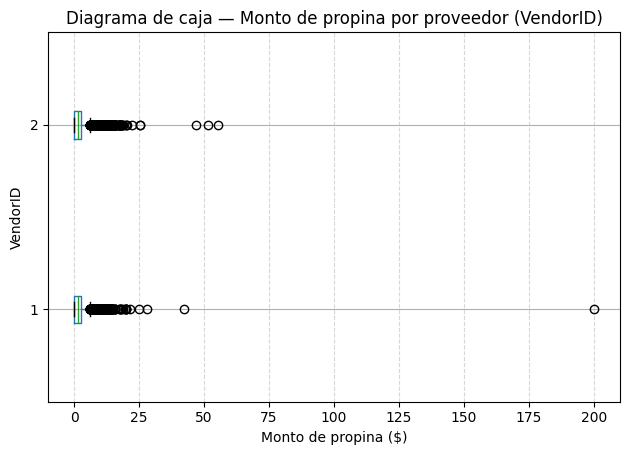

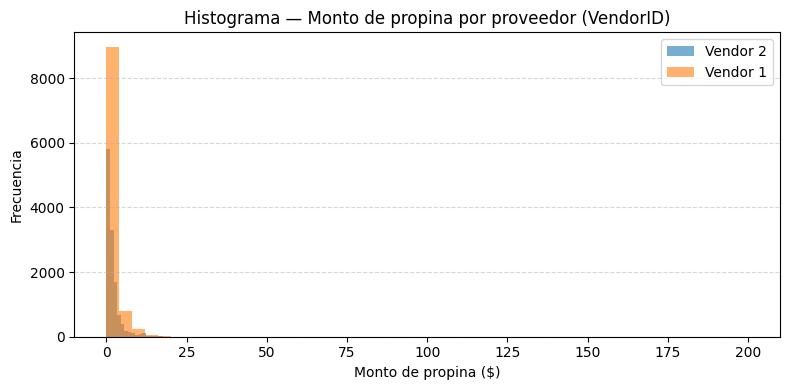

In [70]:
# Diagrama de caja del monto de propina por proveedor (VendorID)
plt.figure(figsize=(8, 4))
df.boxplot(
    column='tip_amount',
    by='VendorID',
    vert=False,
    showfliers=True
)
plt.title('Diagrama de caja — Monto de propina por proveedor (VendorID)')
plt.suptitle('')  # Elimina el título automático de pandas
plt.xlabel('Monto de propina ($)')
plt.ylabel('VendorID')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Histograma del monto de propina por VendorID
plt.figure(figsize=(8, 4))
for vendor in df['VendorID'].dropna().unique():
    plt.hist(
        df.loc[df['VendorID'] == vendor, 'tip_amount'].dropna(),
        bins=50,
        alpha=0.6,
        label=f'Vendor {vendor}'
    )

plt.title('Histograma — Monto de propina por proveedor (VendorID)')
plt.xlabel('Monto de propina ($)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Propina media según el número de pasajeros**

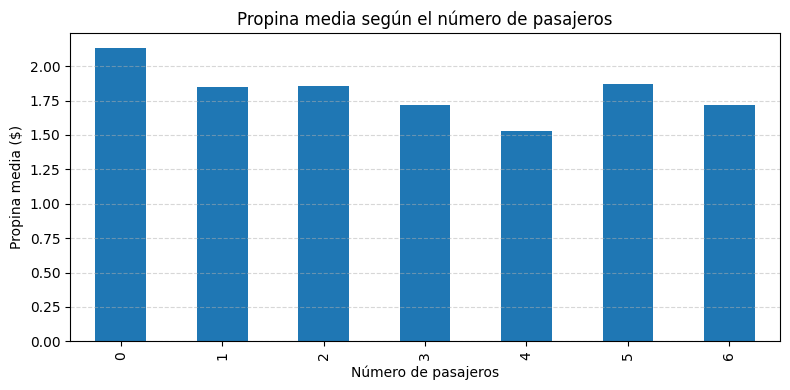

In [71]:
# Valores únicos en la columna passenger_count
df['passenger_count'].dropna().unique()

# Calcular la propina media por número de pasajeros
mean_tips = (
    df.groupby('passenger_count')['tip_amount']
      .mean()
      .sort_index()
)

# Diagrama de barras: propina media según número de pasajeros
plt.figure(figsize=(8, 4))
mean_tips.plot(kind='bar')
plt.xlabel('Número de pasajeros')
plt.ylabel('Propina media ($)')
plt.title('Propina media según el número de pasajeros')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Total de viajes por mes**

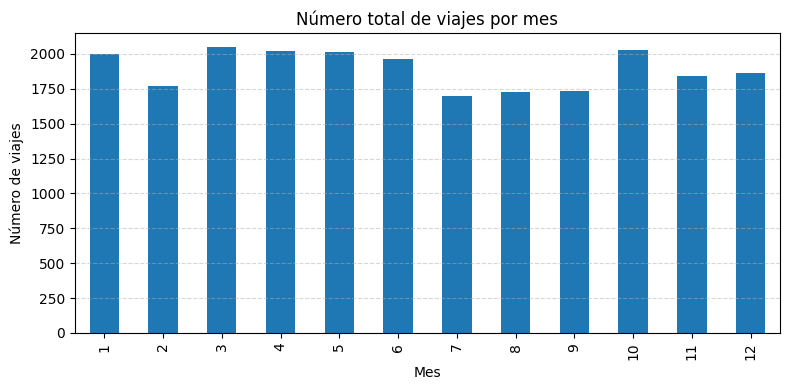

In [72]:
# Crear columna de mes a partir de la fecha de recogida
df['month'] = df['tpep_pickup_datetime'].dt.month

# Crear columna de día del mes a partir de la fecha de recogida
df['day'] = df['tpep_pickup_datetime'].dt.day

# Calcular el total de viajes por mes
monthly_trips = (
    df.groupby('month')
      .size()
      .sort_index()
)

# Gráfico de barras: número total de viajes por mes
plt.figure(figsize=(8, 4))
monthly_trips.plot(kind='bar')
plt.xlabel('Mes')
plt.ylabel('Número de viajes')
plt.title('Número total de viajes por mes')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Total de viajes por día**

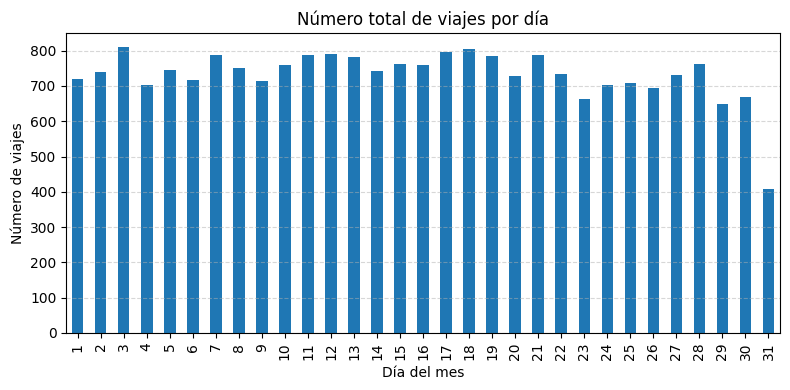

In [73]:
# Calcular el total de viajes por día del mes
daily_trips = (
    df.groupby('day')
      .size()
      .sort_index()
)

# Gráfico de barras: número total de viajes por día
plt.figure(figsize=(8, 4))
daily_trips.plot(kind='bar')
plt.xlabel('Día del mes')
plt.ylabel('Número de viajes')
plt.title('Número total de viajes por día')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Ingresos totales por mes**

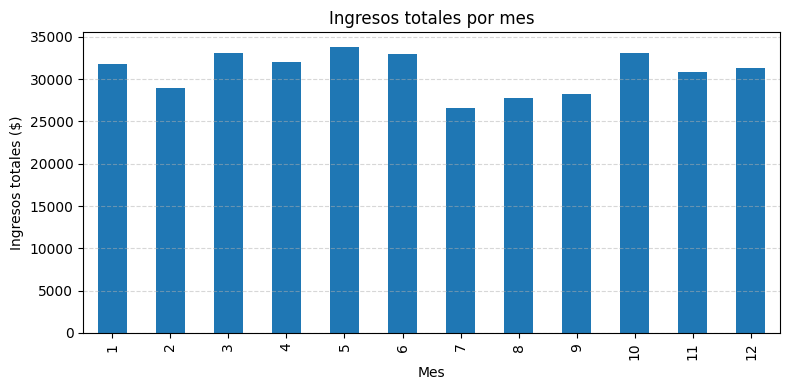

In [74]:
# Calcular los ingresos totales por mes
monthly_revenue = (
    df.groupby('month')['total_amount']
      .sum()
      .sort_index()
)

# Gráfico de barras: ingresos totales por mes
plt.figure(figsize=(8, 4))
monthly_revenue.plot(kind='bar')
plt.xlabel('Mes')
plt.ylabel('Ingresos totales ($)')
plt.title('Ingresos totales por mes')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Ingresos totales por día**

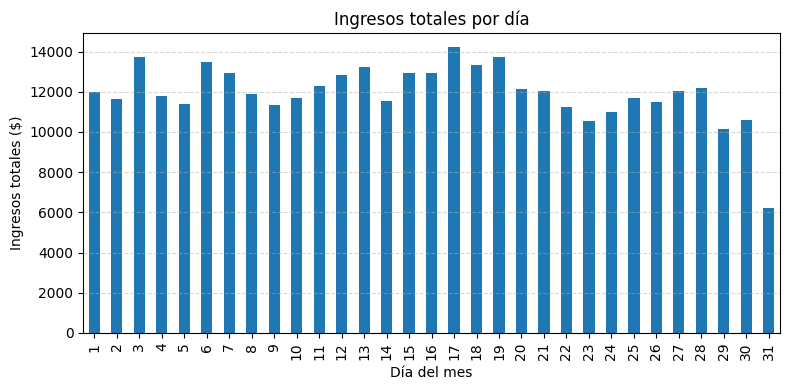

In [75]:
# Calcular los ingresos totales por día del mes
daily_revenue = (
    df.groupby('day')['total_amount']
      .sum()
      .sort_index()
)

# Gráfico de barras: ingresos totales por día
plt.figure(figsize=(8, 4))
daily_revenue.plot(kind='bar')
plt.xlabel('Día del mes')
plt.ylabel('Ingresos totales ($)')
plt.title('Ingresos totales por día')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Diagrama de dispersión: monto total vs distancia del viaje**

Para analizar la relación entre la distancia del viaje y el monto total cobrado, se utilizó un diagrama de dispersión. Esta visualización permite evaluar cómo varía el ingreso en función de la distancia recorrida y detectar patrones generales, concentraciones de datos y posibles valores atípicos.

El diagrama de dispersión fue desarrollado en Tableau, lo que facilitó la exploración interactiva de los datos y una presentación más clara de la relación entre `trip_distance` y `total_amount`. Esta visualización se incorporó al resumen ejecutivo para apoyar la comunicación de hallazgos clave a stakeholders no técnicos.


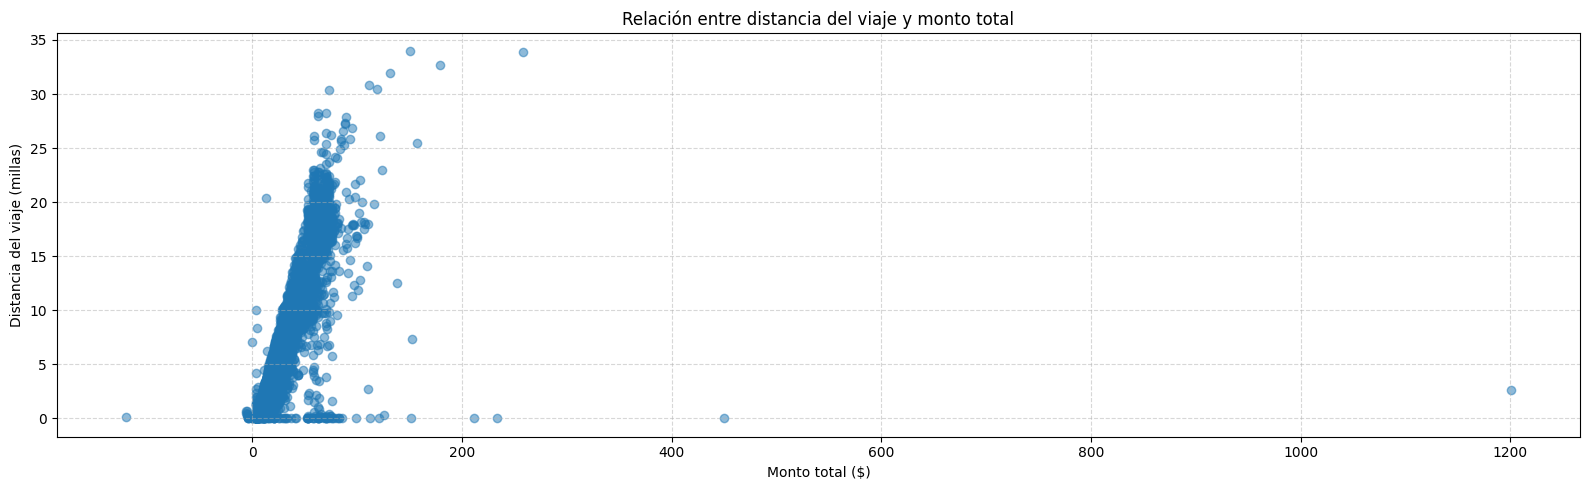

In [76]:
# Diagrama de dispersión: monto total vs distancia del viaje
plt.figure(figsize=(16, 5))
plt.scatter(
    df['total_amount'],
    df['trip_distance'],
    alpha=0.5
)
plt.xlabel('Monto total ($)')
plt.ylabel('Distancia del viaje (millas)')
plt.title('Relación entre distancia del viaje y monto total')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Distancia media del viaje por ubicación de recogida**

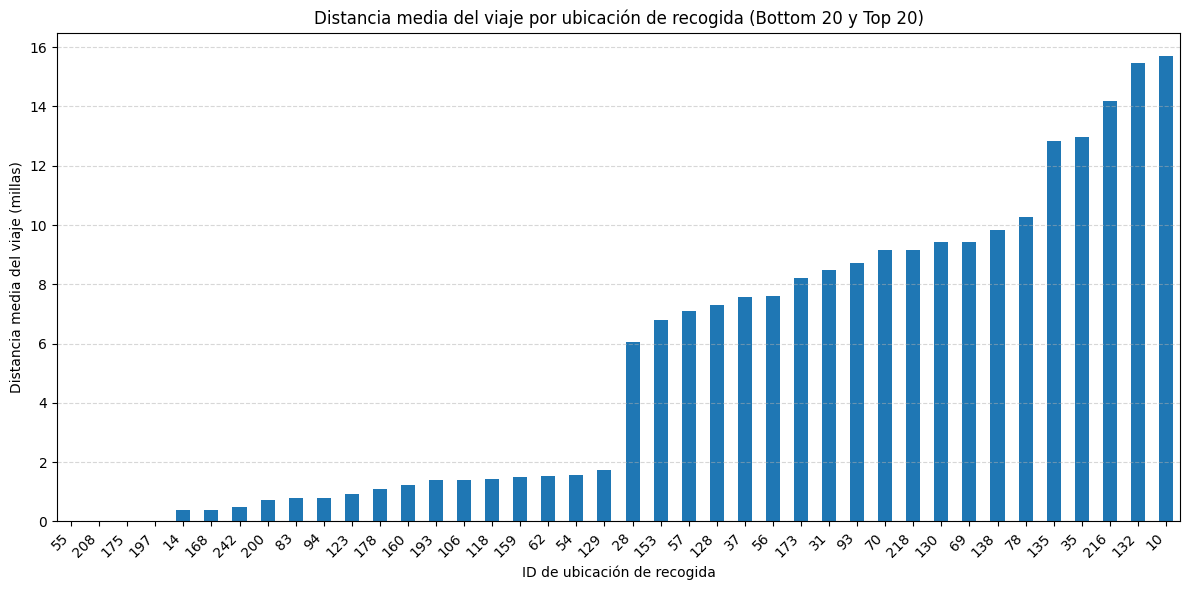

In [77]:
# Número de ubicaciones de recogida únicas
df['PULocationID'].nunique()

# Calcular la distancia media del viaje por ubicación de recogida
mean_trip_distance_by_location = (
    df.groupby('PULocationID')['trip_distance']
      .mean()
      .sort_values()
)

# Seleccionar las 20 ubicaciones con menor y mayor distancia media
bottom_locations = mean_trip_distance_by_location.head(20)
top_locations = mean_trip_distance_by_location.tail(20)

# Combinar para visualización
plot_data = pd.concat([bottom_locations, top_locations])

# Gráfico de barras: distancia media del viaje por ubicación de recogida
plt.figure(figsize=(12, 6))
plot_data.plot(kind='bar')
plt.xlabel('ID de ubicación de recogida')
plt.ylabel('Distancia media del viaje (millas)')
plt.title('Distancia media del viaje por ubicación de recogida (Bottom 20 y Top 20)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: Ejecutar 

## Resultados y evaluación

El análisis exploratorio de datos permitió identificar patrones claros en el comportamiento de los viajes de taxi, así como la presencia de valores atípicos relevantes desde el punto de vista operativo y financiero.

Se observó que la mayoría de los viajes corresponden a trayectos cortos, con distancias y duraciones reducidas, concentrando también los montos totales más frecuentes. Las distribuciones de variables como `trip_distance`, `trip_duration` y `total_amount` presentan asimetría positiva, con un número reducido de viajes largos o costosos que generan colas largas en las distribuciones.

Los diagramas de caja evidencian valores atípicos, incluyendo montos negativos y valores extremadamente altos, lo que sugiere posibles errores de registro o situaciones excepcionales que deben ser consideradas al momento de realizar análisis posteriores o reportes financieros.

El análisis temporal muestra variaciones en el volumen de viajes y en los ingresos totales a lo largo del mes, lo que indica patrones estacionales y comportamientos recurrentes en la demanda. Asimismo, la relación observada entre la distancia del viaje y el monto total cobrado confirma una asociación positiva general, aunque con alta dispersión en viajes de mayor distancia.

En conjunto, los resultados obtenidos cumplen con el objetivo del análisis exploratorio, proporcionando una comprensión sólida de la estructura de los datos, sus principales características y las variables que tienen mayor impacto en el comportamiento de los viajes.


## Implicancias para el negocio

- La alta concentración de viajes cortos sugiere que la mayor parte de los ingresos proviene de trayectos urbanos frecuentes, lo que puede guiar estrategias de optimización operativa y asignación de flota.
- La presencia de valores atípicos y montos negativos indica la necesidad de controles de calidad de datos más estrictos antes de utilizar la información para reportes financieros o toma de decisiones.
- Las variaciones temporales en la demanda y en los ingresos permiten identificar períodos de mayor actividad, lo que puede apoyar decisiones relacionadas con planificación de recursos y análisis de estacionalidad.
- La relación positiva entre distancia del viaje y monto total, aunque con alta dispersión, sugiere oportunidades para analizar estructuras tarifarias y comprender mejor los factores que influyen en el costo final del viaje.


## Conclusión

El análisis exploratorio de los datos de viajes de taxi (TLC) permitió comprender el comportamiento general de los trayectos, identificar patrones recurrentes y detectar anomalías relevantes en variables clave como la distancia, la duración y los montos cobrados.

Los resultados muestran que la mayoría de los viajes son cortos y generan ingresos moderados, mientras que un número reducido de trayectos largos o costosos introduce alta variabilidad en los datos. La presencia de valores atípicos y montos negativos resalta la importancia de validar y depurar la información antes de utilizarla en análisis más avanzados o en la toma de decisiones operativas.

Asimismo, el análisis temporal y la relación entre distancia y monto total aportan una visión clara de cómo se estructuran los ingresos y la demanda a lo largo del tiempo, lo que resulta útil para comprender la dinámica del servicio.

En conjunto, este análisis proporciona una base sólida para la comunicación de insights a stakeholders y para el desarrollo de análisis posteriores, como modelos predictivos o evaluaciones más detalladas del desempeño del servicio de transporte.
